# Modeling Ridesharing Conditions Using ABM and OOP

#### By: MacKenzie Dubay, Katrina Gensterblum, Adhi Rajaprabhakaran

## _Outline_

### 1. Motivation  
    - The idea, its inspiration, and its practical uses.  
### 2. Objectives  
    - What we set out to accomplish with this model.  
### 3. The Model  
    - How we used Agent Base Modeling and OOP to create a flexible model of Uber's operations.  
### 4. The Experiments
    - Varying Passengers
    - Varying Drivers  
------

## Motivation

  Our project is about applying modeling techniques learned in class to a approximate a real life scenario. Our scenario is the operations of a ridesharing service. Ridesharing services refer to apps like Uber and Lyft, where one can use the app to request a ride from one point to another. Naturally, one of the key attributes of the product is user experience and convenience, so as to incline users to use the service more often. 
  
  Arguably the most important quantifiable figures to this end are the cost of the ride and the time taken, both in getting picked up and in getting to the destination. In both metrics, lower is better for more usage, and the metric we chose to target is wait time, and how it can vary as the conditions of the real world vary.

  The idea was inspired by Kevin Novak, MSU Alumnus and Head of Data Science at Uber Technologies Inc., and the talk he gave here at MSU. In his talk, he covered how Uber would gain insights from its data from operations and use them to improve the product. Since we don't have the actual data of Uber's rides to query, we can't actually work to solve the optimization problems that Uber themselves work on. What we can do, though, is make our own data with our own model, and run experiments on the model observe the effect of different conditions. 
  
  Our solution is a very simplified version of the real world, so it won't actually predict what exactly will happen. What the experimentation will allow us to do is to observe the relationships between hypothetical conditions and outcomes, and extrapolate these observations to the real world.

## Objectives

Our first objective was to design and implement a simulation of Uber's ridesharing service. We wanted to utilize programming and modeling techniques learned in class to make the model flexible and easy to iterate upon should we want to add features and conduct different experiments.

Secondly, we set out to apply experimental procedures to observe the effect of varying conditions on the behavior outcomes of the model. 

## The Model

Ridesharing is the act of a driver with his or her own car picking up a passenger (or group of passengers) and taking the passenger to his or her destination in exchange for a fare charge. At any given time in any given area, there may be some arbritary numbers of drivers looking to get a fare and passengers. Every unique driver will be picking up their own unique passenger who has their own unique destination. Thus, this objective is well-suited to Agent Based Modeling (ABM) via Object Oriented Programming. We treated each driver and each passenger as its own agent using `class` objects, a technique that was introduced to us in class in the Ant Crawling Model.

The `class` objects for the Rider and Driver agent can be found in `rider.py` and `driver.py` respectively. Let's take a look at them.

In [1]:
from UberModel import driver
# list functions here, or below idk

Talk about the driver class here. Describe in plain english its role and different functions.

In [2]:
from UberModel import rider
# list functions here, or below idk

Talk about the rider class here. Describe in plain english its role and different functions. Explain why we used a spawn probability instead of just setting rider count.

Executing the model:


In [3]:
from UberModel import run

#maybe show the whole run function?

Describe how the run function works here.

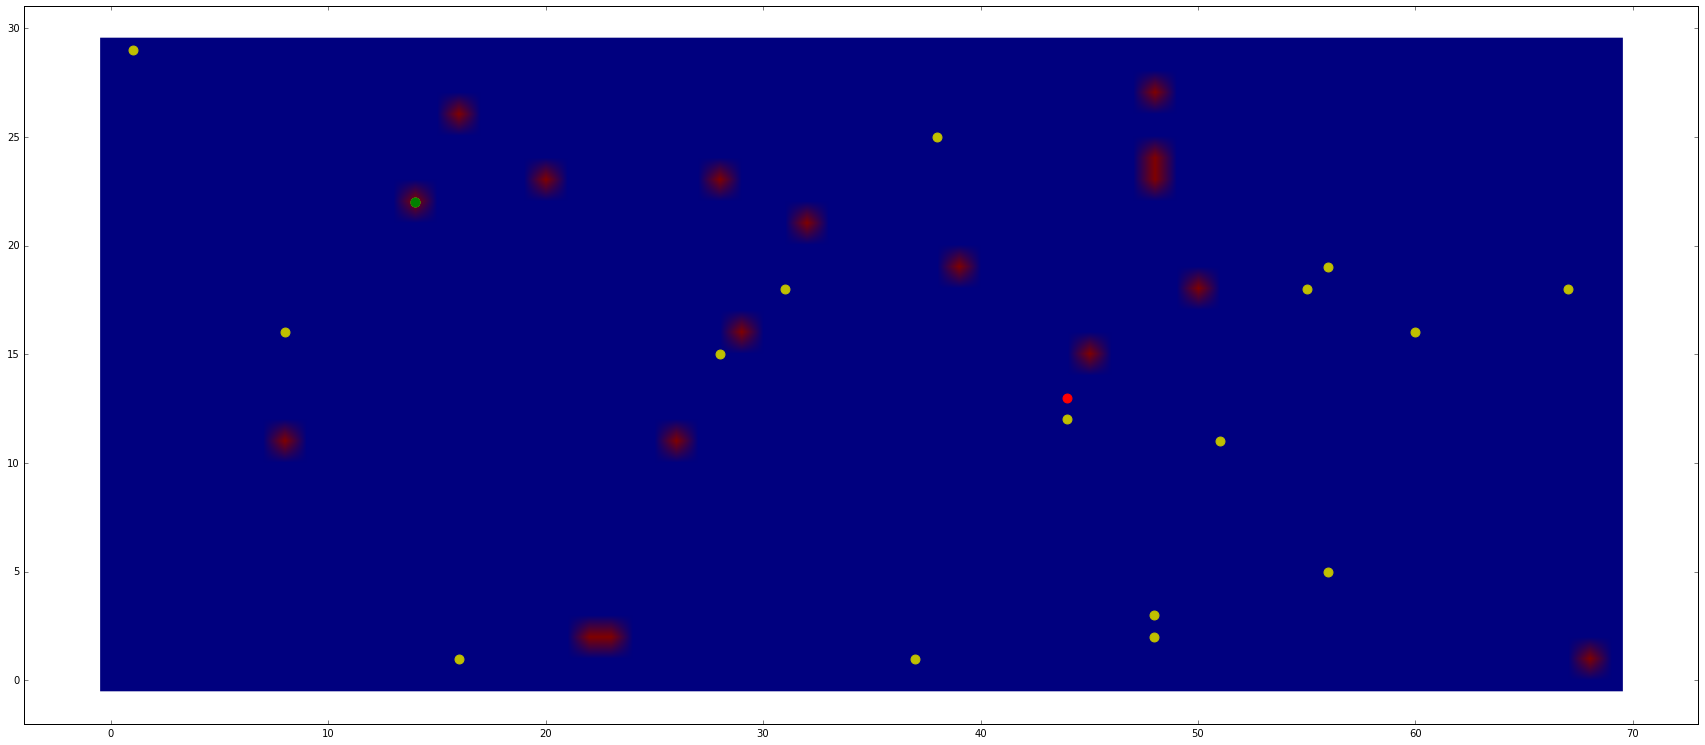

([11, 6], [45, 59])

In [4]:
#actually run one example of the model with animation
import UberModel
%matplotlib inline
run(num_drivers = 2, rider_spawn_prob = 0.2, x_dim = 70, y_dim = 30, iterations = 100, vis = True)

## The Experiments

Due to the flexibility afforded to us by our OOP approach, we can easily run more than one experiment. In the first experiment, we will hold the amount of drivers constant and vary the probability a passenger will spawn as a proxy of 'busyness'. So the indpendent variable will be the busyness, and the dependent variables will be both wait time and ride time. In the second, we will hold the busyness constant and vary the amount of drivers available to serve. Here, the dependent variables stay the same but the independent variable will be the drivers. We think that observing the relationships between these variables will provide some rudimentary insight into how the real world works.

### Experimental procedure

To combat confounding variables such as randomness, we will be iterating every model 500 increments to allow for a sufficient progression of the model to average out inconsistencies. Driver spawn points are chosen in the beginning and new drivers do not spawn, so the spacing of the initial spawn point may have a significant. So, for each step in the variation we will run the model 5 times to account for the randomness of driver spawn points.

What follows is a generalized function for conducting experiments with this model. The default parameters are borrowed from the default parameters of `run()`. The new parameters, something, something, and something, will give the experimenter the ability to quickly and easily adjust the parameters of the experiment.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import numpy as np
from IPython.display import display, clear_output
import time
import math

def experiment(independent_variable = '', IV_vals = [], x_dim = 70, y_dim = 30, iterations = 100, vis = False):
    '''
    Conducts the experiment of the given parameters on the UberModel, and returns the data of the experiment
    in a form that makes analysis and plotting easy.
    
    The last six parameters are default parameters borrowed from the `run()` function and are passed 
    into the `run()` within the experiment. The default values are the same, save for `vis` which is 
    set to `False` by default to expedite the experiment.
    
    `independent_variable` must be a string, either "rider" or "driver".
    
    `IV_vals` must be a list of the tested values of the independent variable. For drivers this must
    be a list of integers. For riders it must be a list of values greater than 0 and less than 1.'''
    
    wait_times_per_IV = []
    ride_times_per_IV = []
    
    wait_times_per_run = []
    ride_times_per_run = []
    
    # Check which experiment to do
    if to.lower(str(independent_variable)) == 'driver':
        
        # Check if independent values make sense
        if False in [x % 1 == 0 for x in IV_vals]:
            raise ValueError('You are testing quantity of drivers, so only use integers in IV_vals.')
            
        # Run the model over each value of the independent variable list           
        for val in IV_vals:
            w, r = run(num_drivers = val, x_dim = x_dim, y_dim = y_dim, iterations = iterations, vis = vis)
            
            # Averaging the wait times of every rider in the run
            avg_w = sum(w)/len(w)
            avg_r = sum(r)/len(r)
            
            wait_times_per_run.append(avg_w)
            ride_times_per_run.append(avg_r)
                              
    if to.lower(str(independent_variable)) == 'rider':
        
        # Check if independent values make sense
        if False in [x > 1 or x <= 0 for x in IV_vals]:
            raise ValueError('You are testing probability of rider spawn, so please only use floats between 0 and 1.')
            
        # Run the model over each value of the independent variable list           
        for val in IV_vals:
            w, r = run(rider_spawn_prob = val, x_dim = x_dim, y_dim = y_dim, iterations = iterations, vis = vis)
            
            # Averaging the wait times of every rider in the run
            avg_w = sum(w)/len(w)
            avg_r = sum(r)/len(r)
            
            wait_times_per_run.append(avg_w)
            ride_times_per_run.append(avg_r)
            
    # Averaging the average wait times of every rider of every run to get a value that corresponds with the IV
    wait_times_per_IV.append(sum(wait_times_per_run)/len(wait_times_per_run))
    run_times_per_IV.append(sum(run_times_per_run)/len(run_times_per_run))
    
    return IV_vals, wait_times_per_IV, run_times_per_IV

In [6]:
import math
math.average

AttributeError: module 'math' has no attribute 'average'

### Experiment 1: Varying busyness

**Parameters of the experiment:**  
* Independent Variable:  
    * The probability a rider spawns on an iteration of the model, as a proxy of 'busyness'.  
* Dependent Variables:  
    * Rider wait time measured in iterations, as a proxy for minutes elapsed  
    * Rider ride time measured likewise.
* Controlled:  
    * Number of drivers  
    * Driver behavior  
    * Rider behavior  
    * Board size